In [1]:
%load_ext autoreload
%autoreload 2

from model import LitS4Model
from data import LitDataModule
from plotting import *
import torch
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import tqdm
import numpy as np

/n/home07/hbinney/.conda/envs/ssm_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
CHECKPOINT = '/n/holystore01/LABS/iaifi_lab/Lab/creissel/neutrino_mass/trainings/input_I_Q__output_carrierfreq_axialfreq__d_model_8_n_layers_4/lightning_logs/iw44cmsi/checkpoints/epoch=67-step=152184.ckpt'

In [3]:
model = LitS4Model.load_from_checkpoint(CHECKPOINT)
model = model.to(device)
model = model.eval()

In [4]:
#dataset = LitDataModule.load_from_checkpoint(CHECKPOINT, inputs=['output_ts_I'], variables=model.variables)
dataset = LitDataModule.load_from_checkpoint(CHECKPOINT)

In [5]:
true = []
pred = []

for ts,var in dataset.test_dataloader():
    with torch.no_grad():
        pred.append(model(ts.to(device)).cpu().numpy())
        true.append(var.numpy()) 

/n/home07/hbinney/.conda/envs/ssm_env/lib/python3.10/site-packages/torch/nn/functional.py:1381: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


In [6]:
#true = np.concatenate(true)
#pred = np.concatenate(pred)

true = np.concatenate(true, axis=0)
pred = np.concatenate(pred, axis=0)

In [7]:
# undo the normalization
pred_post = pred * dataset.stds + dataset.mu
true_post = true * dataset.stds + dataset.mu

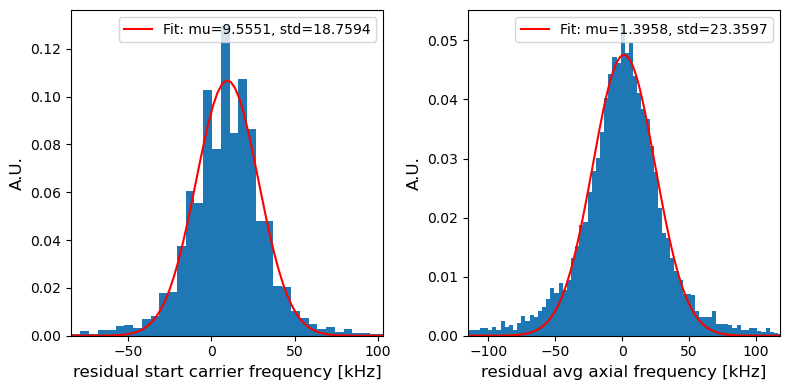

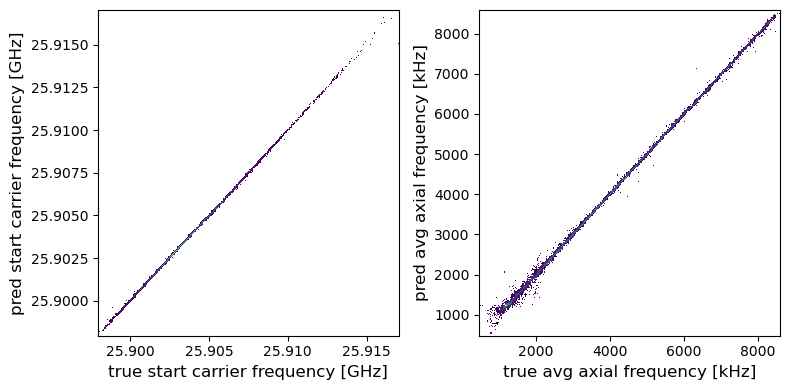

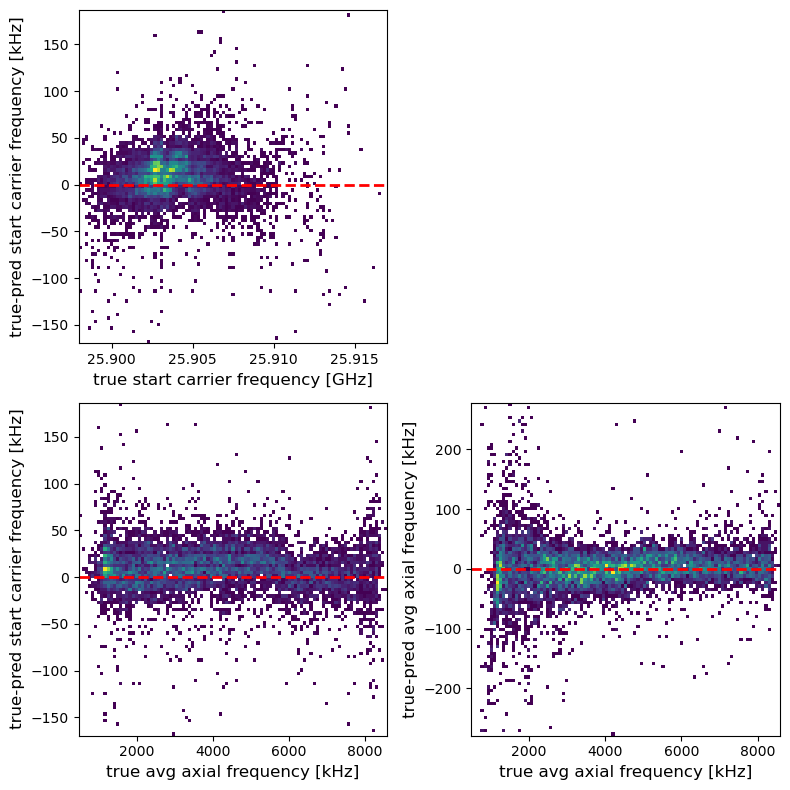

In [8]:
f = make_all_plots(model.variables, true_post, pred_post)